# Predicting LOAN Eligibility Using Machine Learning

##Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

##Reading DataSet

Importing and Reading Dataset

In [2]:
import io
import requests

In [3]:
url = "https://raw.githubusercontent.com/encrypted000/loan_prediction/main/loan_data_set.csv"
get = requests.get(url).content
loan_data = pd.read_csv(io.StringIO(get.decode('utf-8'))) 

In [4]:
#lets real first five rows of the file
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#displaying the shape of the file
loan_data.shape

(614, 13)

##Data Exploration

In [6]:
#lets extract the information of the file including column names and their data types in the DataFrame 'df'
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#lets find out the mathametical details from our dataset like: count, mean, std, min and max using describe function

loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#Loan_ID
loan = loan_data.Loan_ID.value_counts(dropna = False)
loan

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

Above result shows that there are 614 unique ID in the dataset.

##**Analyzing the Data**

In [9]:
#lets create a function to explore the object type of the data

def object_type(df: pd.DataFrame, feature_name: str):
  if df[feature_name].dtype == 'object':
    print(df[feature_name].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64


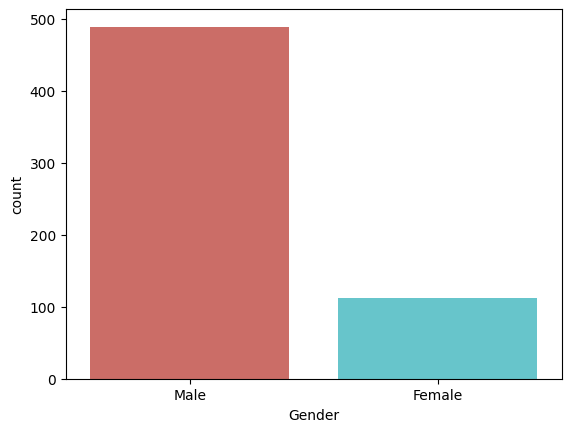

In [10]:
#now lets call the function and apply it in Gender

gender = object_type(loan_data, 'Gender')

#ploting the Gender using seaborn
sns.countplot(x = "Gender", data = loan_data, palette = "hls")

#display
plt.show()

Above result shows that the number of male applicants are more if we compare with female applicants.

Yes    398
No     213
Name: Married, dtype: int64


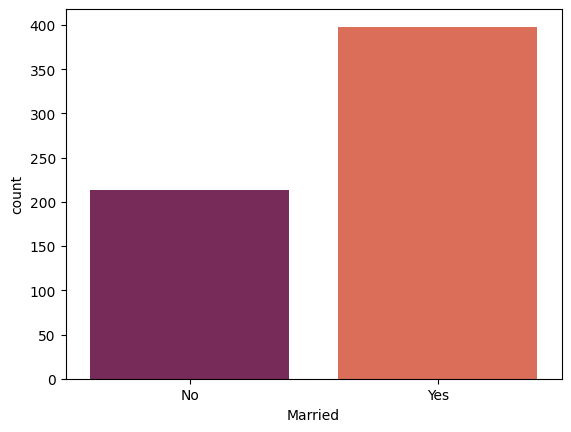

In [11]:
##now lets call the function and apply it in Married

married = object_type(loan_data, 'Married')

#ploting the relationship status using seaborn
sns.countplot(x = "Married", data = loan_data, palette = "rocket")

#display
plt.show()

From the above result we can see that number of married applicants are more than singles.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


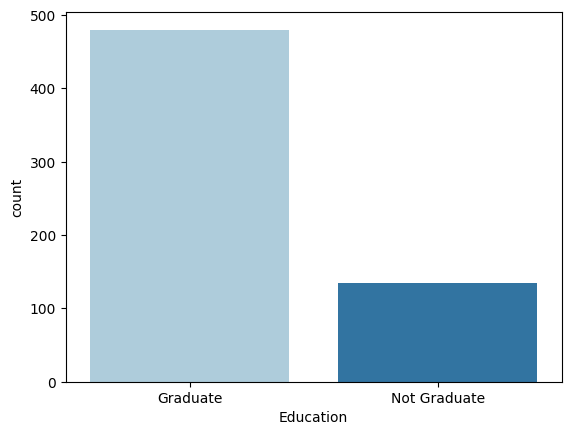

In [12]:
##now lets call the function and apply it in Education

education = object_type(loan_data, 'Education')

#ploting the number of graduate and non graduate using seaborn
sns.countplot(x = "Education", data = loan_data, palette = "Paired")

#display
plt.show()

From the above result we can see that number of graduate applicants are more than non graduate.

No     500
Yes     82
Name: Self_Employed, dtype: int64


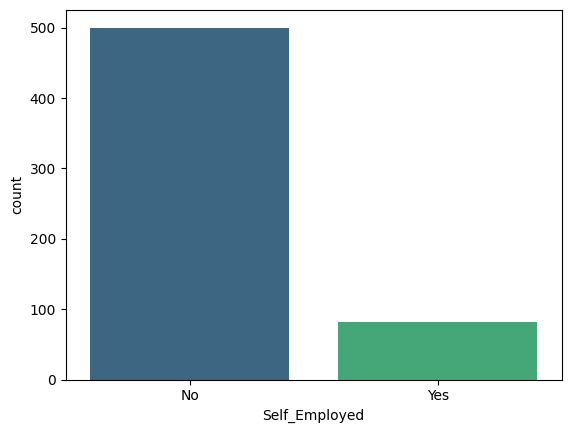

In [13]:
##now lets call the function and apply it in Self_Employed

self_employed = object_type(loan_data, 'Self_Employed')

#ploting the number of self employed using seaborn
sns.countplot(x = "Self_Employed", data = loan_data, palette = "viridis")

#display
plt.show()

From above result we can see that number of non self employed applicants are more than self employed.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


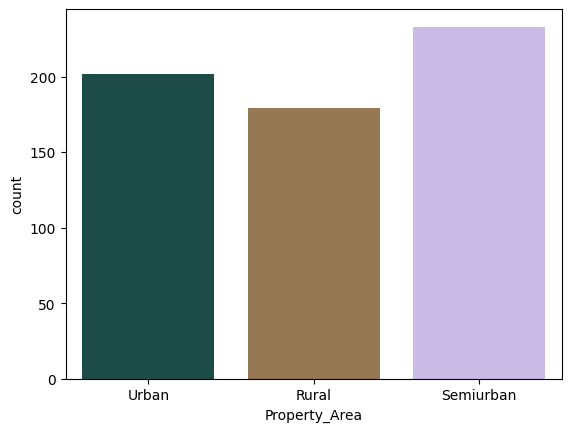

In [14]:
##now lets call the function and apply it in Property_Area

property_area = object_type(loan_data, 'Property_Area')

#ploting the number of property area using seaborn
sns.countplot(x = "Property_Area", data = loan_data, palette = "cubehelix")

#display
plt.show()

From the above result we can see that property area are equally distributed on urban, rural and semiurban.

Y    422
N    192
Name: Loan_Status, dtype: int64


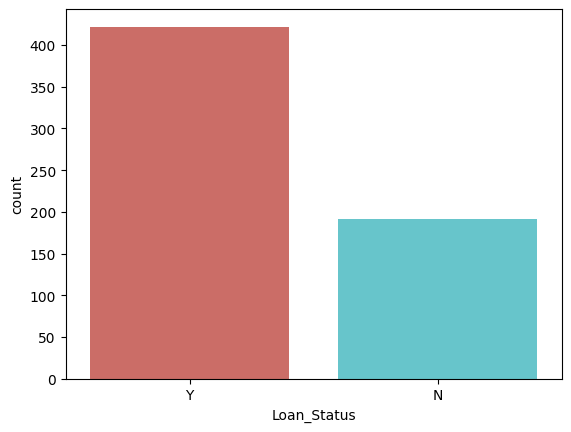

In [15]:
#Loan_Status
loan_status = object_type(loan_data, 'Loan_Status')

#ploting the number of loan status using seaborn
sns.countplot(x = "Loan_Status", data = loan_data, palette = "hls")

#display
plt.show()

From the above result we can see that percentage of approved loan status of the applicant is more.

**Let's find out if we have any null values**
> If we have any null values we need to fill it using mean and median by using inbuilt function/package missingno



In [16]:
#listing the null values 

null_values = loan_data.isnull().sum()

null_values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Analyzing above result**

> Loan_ID column has 0 null value

> Gender column has 13 null values

> Married column has 3 null values

> Dependents column has 15 null values

> Education column has 0 null value

> Self_Employed column has 32 null values

> ApplicantIncome column has 0 null value

> CoapplicantIncome column has 0 null value

> LoanAmount column has 22 null values

> Loan_Amount_Term column has 14 null values

> Credit_History column has 50 null values

> Property_Area column has 0 null value

> Loan_Status column has 0 null value

<Axes: >

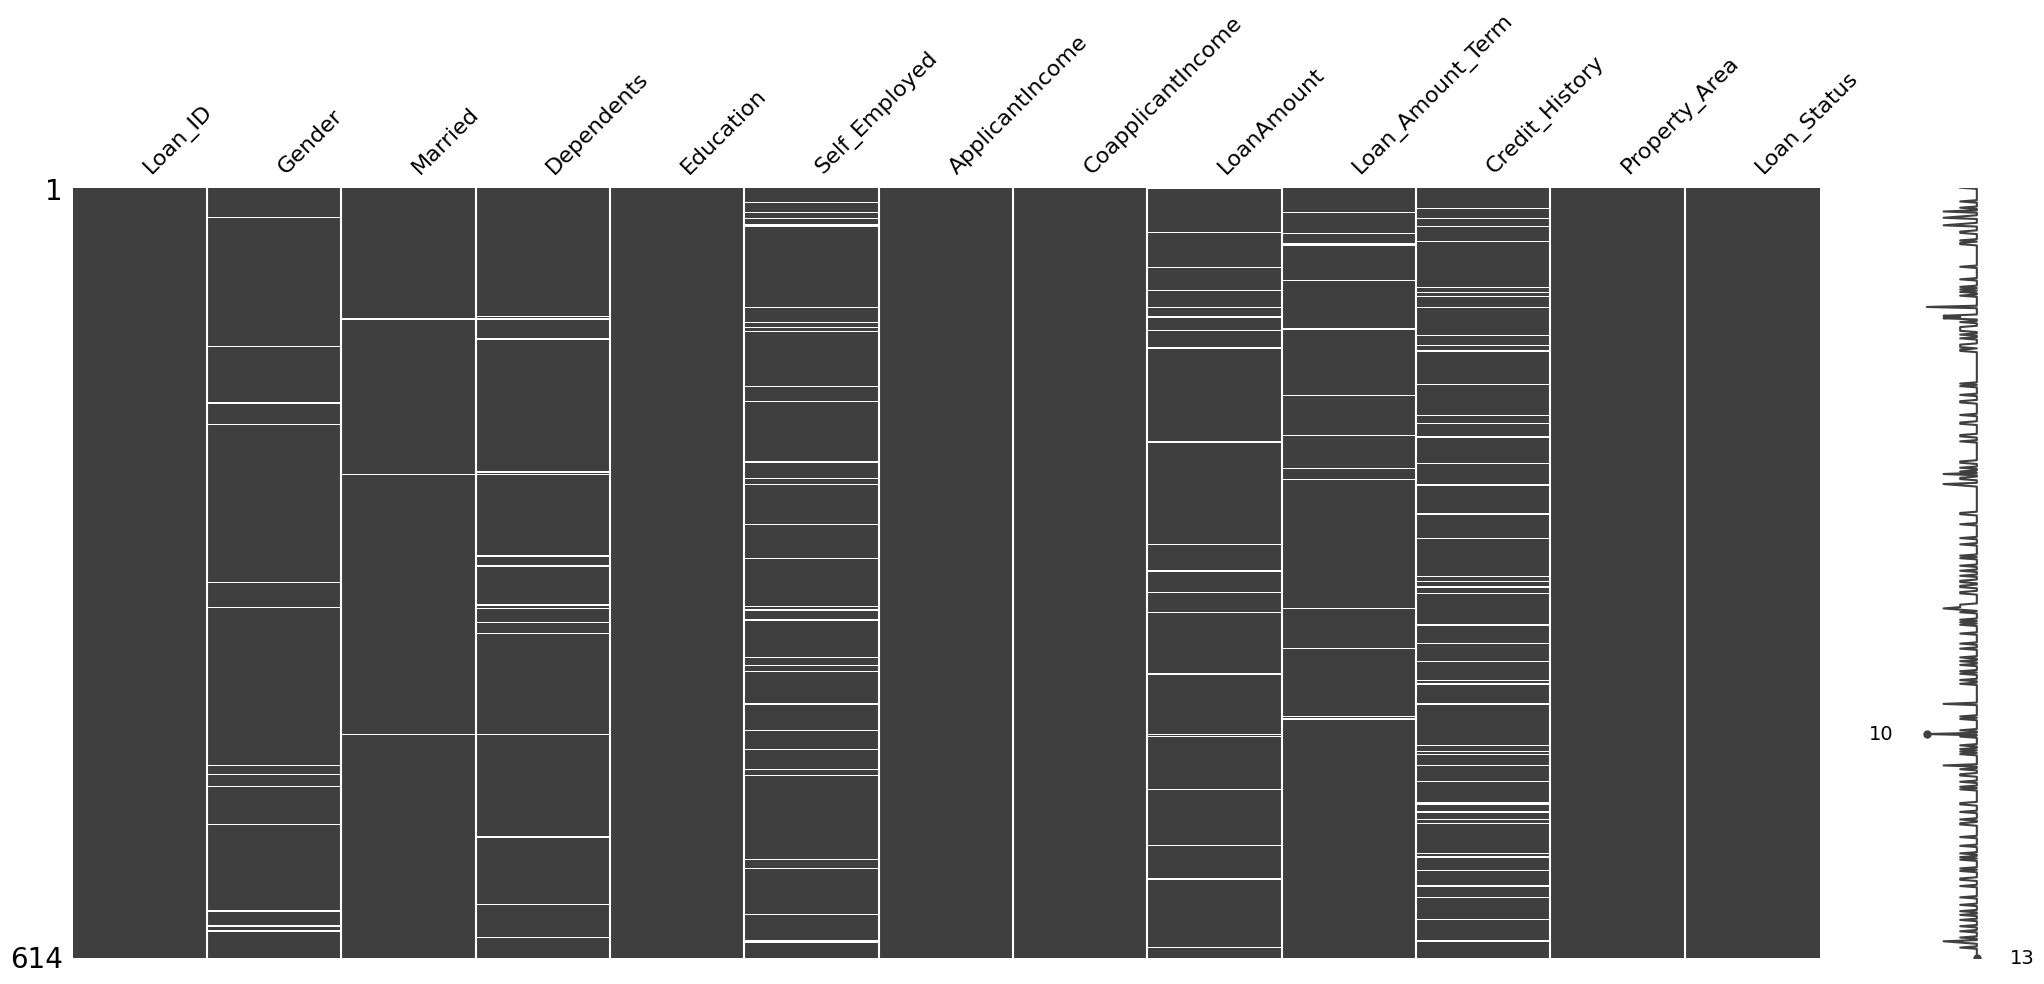

In [17]:
##lets create a matrix plot to visualize the nullity of values

null1 = msno.matrix(loan_data)
null1

<Axes: >

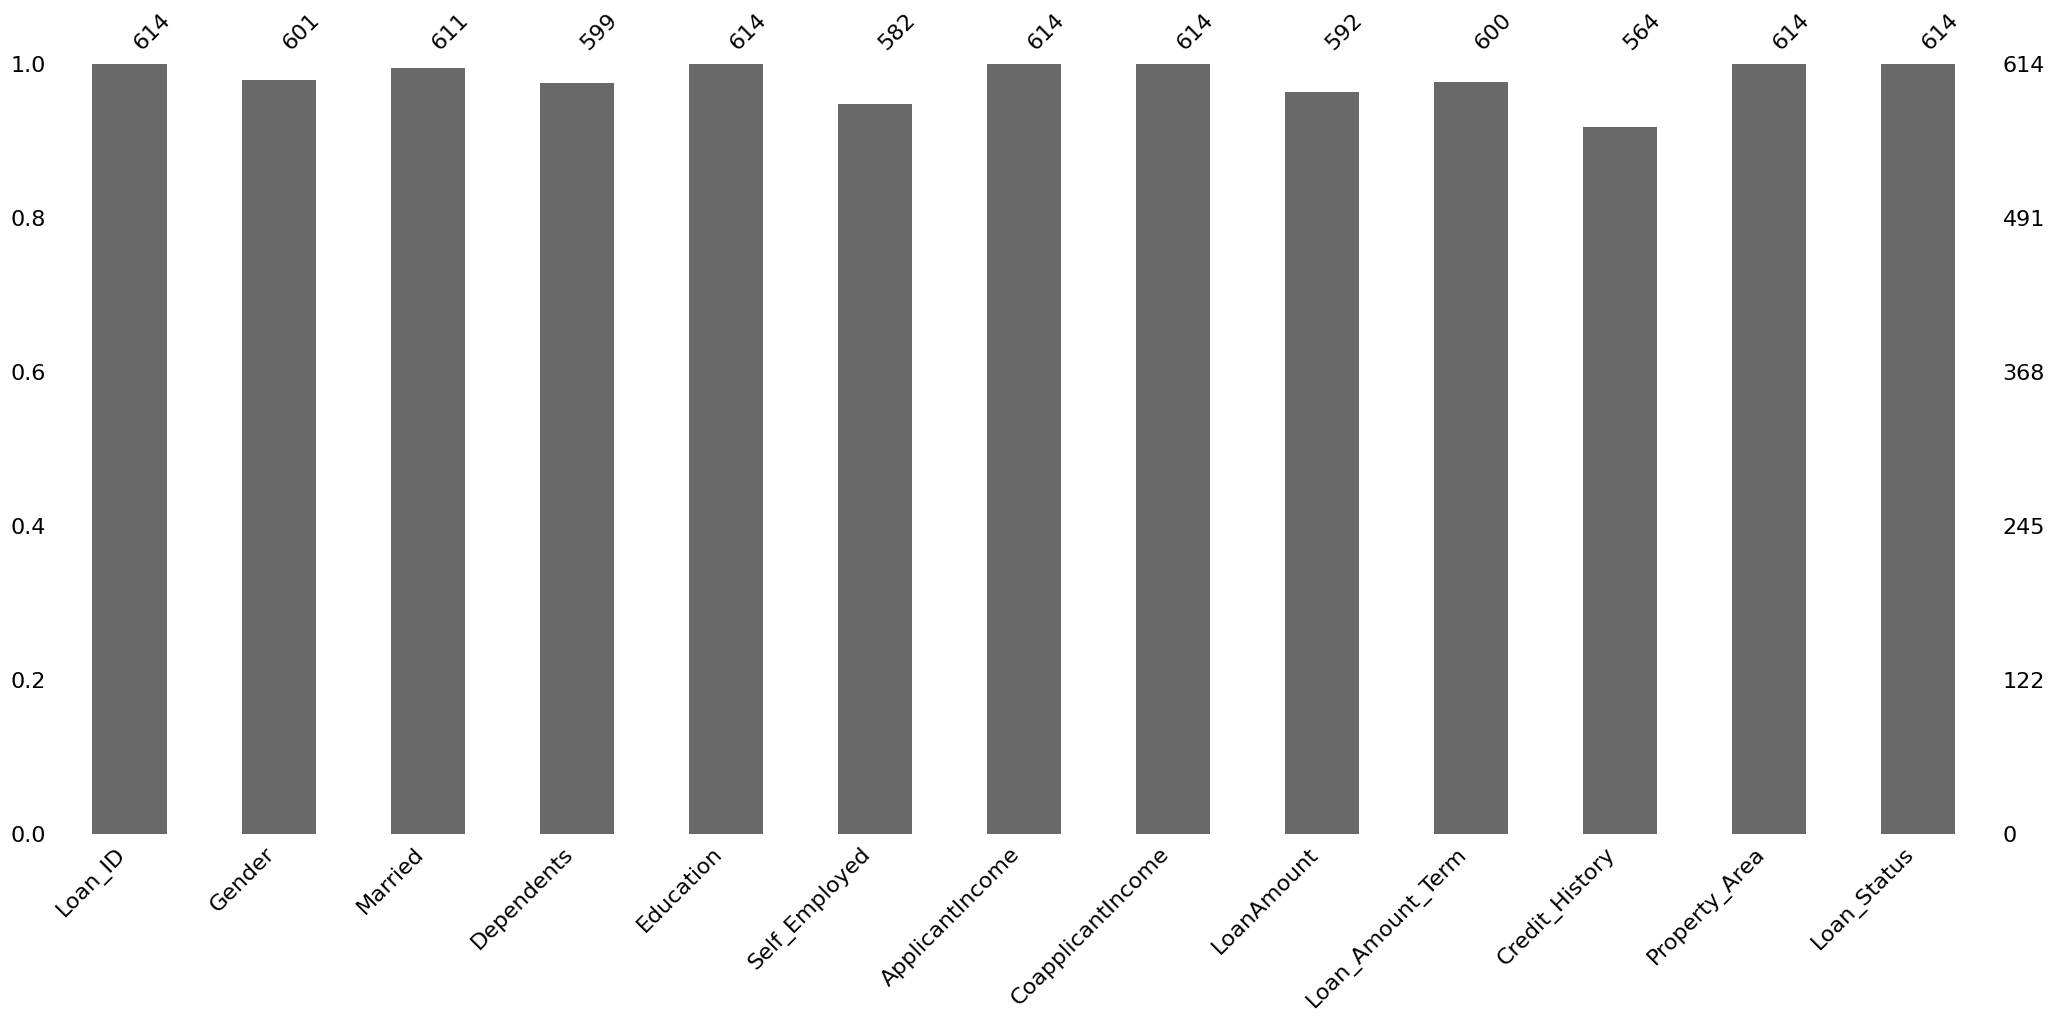

In [18]:
##lets create a bar plot to visualize the nullity of values

null2 = msno.bar(loan_data)
null2

From the above result we can see that there are too many columns missing with small amount if null values



**Dropping Null values**

In [19]:
#dropping the null value

loan_data = loan_data.dropna()

In [20]:
#re-checking null values

null_values = loan_data.isnull().sum()

null_values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see there are no null values present.

In [21]:
loan_data.shape

(480, 13)

**Converting Categorical variables to Numerical variables**

We are only replacing DataFrames "Loan_Status", "Gender", "Married" and "Self_Employed" to 0 and 1 based on their original values.

In [22]:
##gender.replace {"Male" : 1, "Female" : 0}

loan_data.Gender = loan_data.Gender.replace({"Male" : 1, "Female" : 0})

In [23]:
##married.replace {"Yes" : 1, "No" : 0}

loan_data.Married = loan_data.Married.replace({"Yes" : 1, "No" : 0})

In [24]:
##loan_data.replace {"Y" : 1, "N" : 0}

loan_data.Loan_Status = loan_data.Loan_Status.replace({"Y" : 1, "N" : 0})

In [25]:
##self_employed.replace {"Yes" : 1, "No" : 0}

loan_data.Self_Employed = loan_data.Self_Employed.replace({"Yes" : 1, "No" : 0})

In [26]:
#Property_Area.replace {"Rural": 0, "Semiurban": 1, "Urban": 2}

loan_data.Property_Area = loan_data.Property_Area.replace({"Rural": 0, "Semiurban": 1, "Urban": 2})

In [27]:
#Education.replace {"Graduate": 0, "Not Graduate": 1}

loan_data.Education = loan_data.Education.replace({"Graduate": 0, "Not Graduate": 1})

In [28]:
#dependents column

loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

As we know that we can't take 3+ value so I am converting 3+ to 4.

In [29]:
#converting 3+ to 4

loan_data.Dependents = loan_data.Dependents.replace({"3+": 4})

In [30]:
#re-checking 
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Now we can see that 3+ is converted into 4.

In [31]:
#checking the columns value again

loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [32]:
##dropping unnecessary column
loan_data = loan_data.drop(['Loan_ID'], axis = 1)

In [33]:
##separating values i.e. Loan_ID and Loan_Status 

X = loan_data.drop(['Loan_Status'], axis = 1)
Y = loan_data['Loan_Status']

print(X, Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          0              0             4583   
2         1        1          0          0              1             3000   
3         1        1          0          1              0             2583   
4         1        0          0          0              0             6000   
5         1        1          2          0              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          0              0             2900   
610       1        1          4          0              0             4106   
611       1        1          1          0              0             8072   
612       1        1          2          0              0             7583   
613       0        0          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

###Data Visualization

Let's visualize some data for better understanding 

In [34]:
#visualizing the table
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


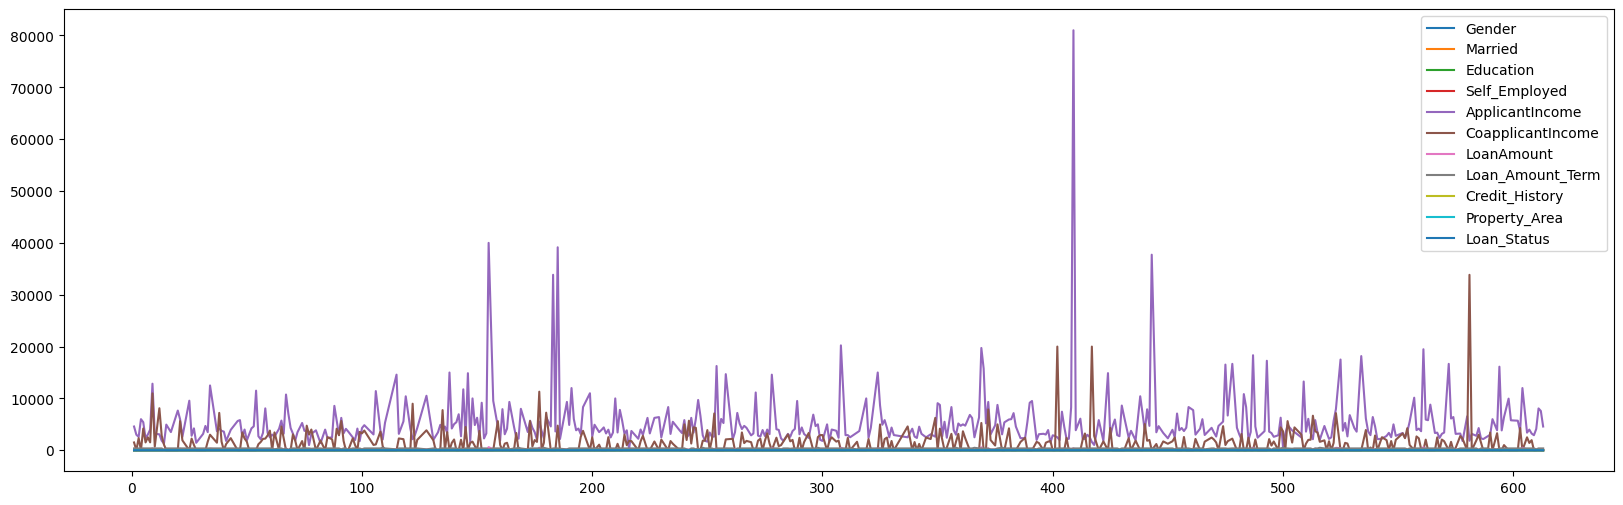

In [35]:
#creating plot to visualize loan_data using default plot type which is line plot and figsize parameter sets size of plot figure i.e. width 20 inches and height 6 inches.

a = loan_data.plot(figsize=(20,6))
plt.show(a)

**Histogram**

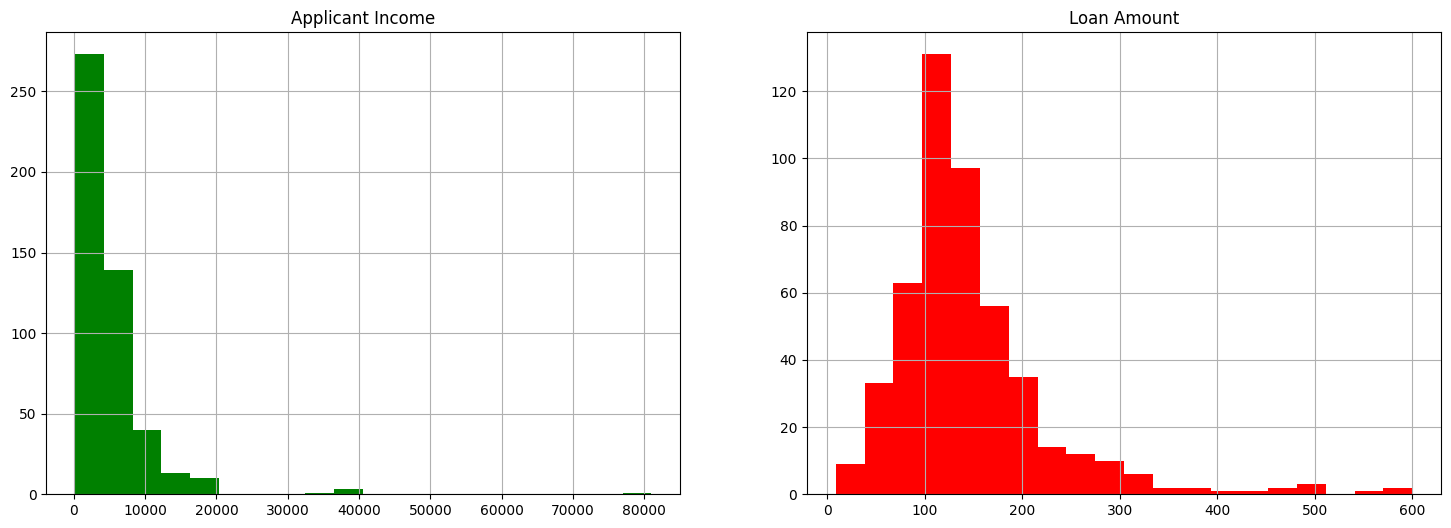

In [36]:
#lets illustrate ApplicantIncome and LoanAmount in histogram distribution

#creating figure with two subplots

plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)

#ploting the first histogram, for ApplicantIncome column with bins 20
loan_data['ApplicantIncome'].hist(bins = 20, color = 'green')
plt.title("Applicant Income") #setting title for first subplot


plt.subplot(1, 2, 2)
plt.grid()

#ploting the first histogram, for LoanAmount column with bins 20
loan_data['LoanAmount'].hist(bins = 20, color = 'red')
plt.title("Loan Amount") #setting title for second subplot

#display
plt.show()

**Scatter Plot**

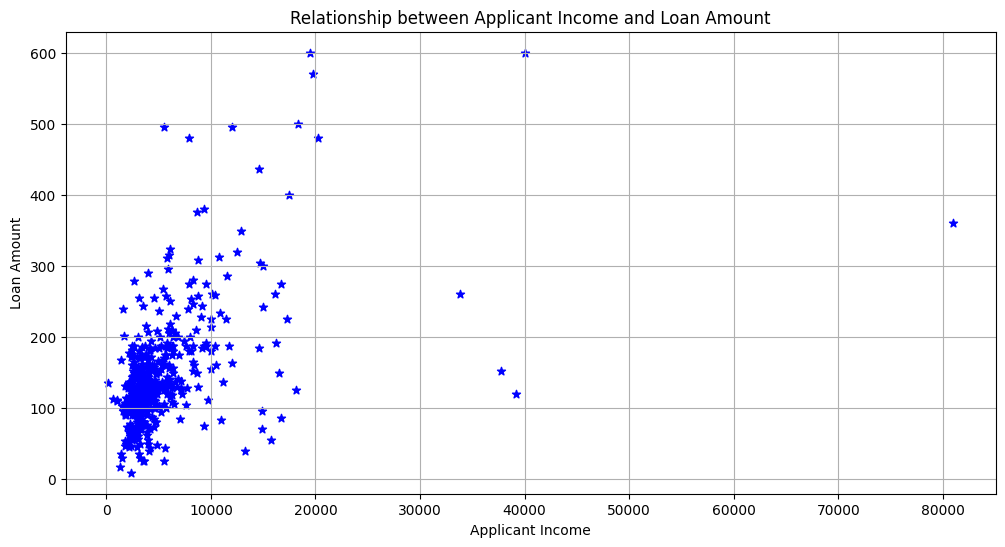

In [37]:
##creating figure specific size

plt.figure(figsize = (12, 6))

##setting up the title 
plt.title("Relationship between Applicant Income and Loan Amount")

##add gridlines to the plot
plt.grid()

##creating a scatter plot with ApplicantIncome and LoanIncome in the x-axis and y-axis respectively
plt.scatter(loan_data['ApplicantIncome'], loan_data['LoanAmount'], c = 'b', marker = '*')

#label x-axis and y-axis
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")

#display
plt.show()

**Let's illustrate in Heatmap**

<ipython-input-38-abf417f1a62d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = loan_data.corr()


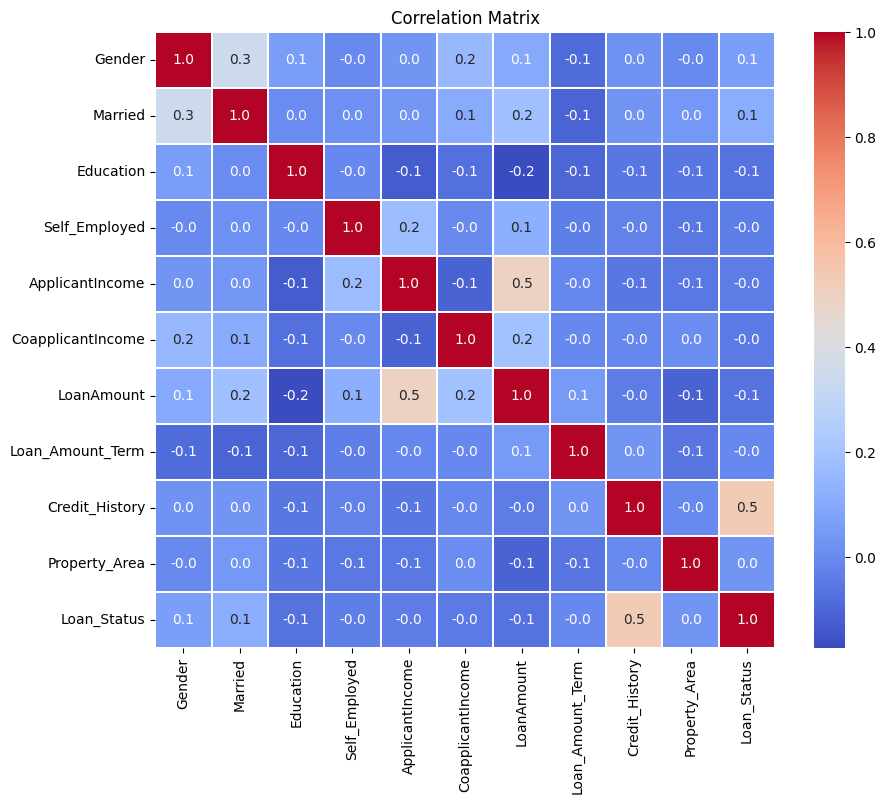

In [38]:
#creating correlation matrix for dataset
corr_matrix = loan_data.corr()

##creating figure 
plt.figure(figsize = (10, 8))

#creating a heatmap of the correlation matrix
#annot = True shows correlation coefficients in every cell
sns.heatmap(corr_matrix, cmap = "coolwarm", annot = True, fmt = '.1f', linewidths = .1)

#title 
plt.title("Correlation Matrix")

#display
plt.show()

The correlation matrix depicts the relationship between all pairs of variables in the dataset, with values ranging from -1 to 1 (perfect negative correlation). The heatmap shows which variables are significantly associated (positive correlation is indicated in red, negative correlation is shown in blue) and which are not (yellow indicates no correlation). The annot=True argument adds numerical values to each heatmap cell, while the fmt='.1f' parameter requires that each value be rounded to one decimal point. The option linewidths=.1 specifies the width of the lines between cells.

###Features Separating

In [39]:
##importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [40]:
##splitting data into train and test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)

#printing shapes of new sets
print("X shape is:", X.shape)
print("X_train shape is:", X_train.shape)
print("X_test shape is:", X_test.shape)



X shape is: (480, 11)
X_train shape is: (384, 11)
X_test shape is: (96, 11)


###Machine Learning Models

**Support Vector Machine Model**

In [41]:
#importing model

from sklearn import svm

Train Accuracy: 79.17
Test Accuracy: 80.21
confusion matrix:
 [[ 45  73]
 [  7 259]]
classification report:
               precision    recall  f1-score   support

           0       0.87      0.38      0.53       118
           1       0.78      0.97      0.87       266

    accuracy                           0.79       384
   macro avg       0.82      0.68      0.70       384
weighted avg       0.81      0.79      0.76       384

confusion matrix:
 [[16 14]
 [ 5 61]]
classification report:
               precision    recall  f1-score   support

           0       0.76      0.53      0.63        30
           1       0.81      0.92      0.87        66

    accuracy                           0.80        96
   macro avg       0.79      0.73      0.75        96
weighted avg       0.80      0.80      0.79        96



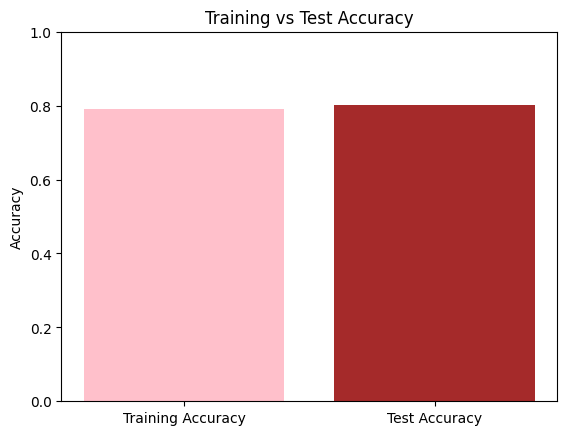

In [42]:
#initilizing
svc = svm.SVC(kernel='linear')

#training the model
svc.fit(X_train, Y_train)

#lets find out the accuracy score on training data

Y_train_pred = svc.predict(X_train)

#lets compare predicted value by our model with the original train Y_train
training_accuracy = accuracy_score(Y_train_pred, Y_train)

#lets find out the accuracy score on test data

Y_test_pred = svc.predict(X_test)

#lets compare predicted value by our model with the original train Y_test
test_accuracy = accuracy_score(Y_test_pred, Y_test)

##calculating confusion matrix  and classification report for train
conf_matrix_train = confusion_matrix(Y_train, Y_train_pred)
cls_report_train = classification_report(Y_train, Y_train_pred)

##calculating confusion matrix  and classification report for test
conf_matrix_test = confusion_matrix(Y_test, Y_test_pred)
cls_report_test = classification_report(Y_test, Y_test_pred)

#printing
print('Train Accuracy:', round(training_accuracy*100,2))
print('Test Accuracy:', round(test_accuracy*100,2))

##for train
print("confusion matrix:\n", conf_matrix_train)
print("classification report:\n", cls_report_train)

##for test
print("confusion matrix:\n", conf_matrix_test)
print("classification report:\n", cls_report_test)


# Data to plot
labels = ['Training Accuracy', 'Test Accuracy']
accuracy = [training_accuracy, test_accuracy]

# Plotting in graph
plt.bar(labels, accuracy, color=['pink', 'brown'])
plt.title('Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


**Logistic Regression**

In [43]:
##importing module
from sklearn.linear_model import LogisticRegression

Train Accuracy: 80.73
Test Accuracy: 83.33
confusion matrix:
 [[ 50  68]
 [  6 260]]
classification report:
               precision    recall  f1-score   support

           0       0.89      0.42      0.57       118
           1       0.79      0.98      0.88       266

    accuracy                           0.81       384
   macro avg       0.84      0.70      0.73       384
weighted avg       0.82      0.81      0.78       384

confusion matrix:
 [[17 13]
 [ 3 63]]
classification report:
               precision    recall  f1-score   support

           0       0.85      0.57      0.68        30
           1       0.83      0.95      0.89        66

    accuracy                           0.83        96
   macro avg       0.84      0.76      0.78        96
weighted avg       0.84      0.83      0.82        96



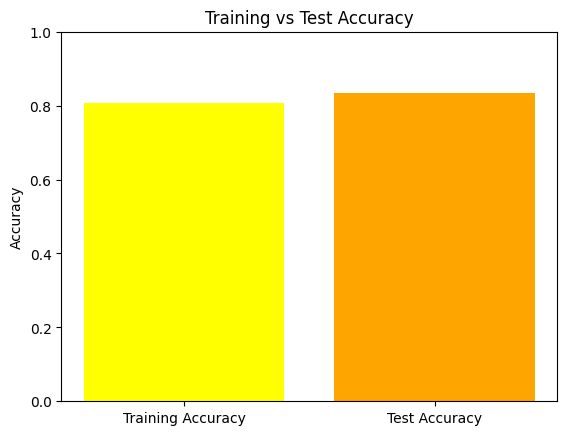

In [44]:
#LogisticRegression

lr = LogisticRegression(max_iter=500)

#fitting in module
lr.fit(X_train, Y_train)

#lets find out the accuracy score on training data

Y_train_pred = lr.predict(X_train)

#lets compare predicted value by our model with the original train Y_train
training_accuracy = accuracy_score(Y_train_pred, Y_train)


#lets find out the accuracy score on test data

Y_test_pred = lr.predict(X_test)

#lets compare predicted value by our model with the original train Y_test
test_accuracy = accuracy_score(Y_test_pred, Y_test)

##calculating confusion matrix  and classification report for train
conf_matrix_train = confusion_matrix(Y_train, Y_train_pred)
cls_report_train = classification_report(Y_train, Y_train_pred)

##calculating confusion matrix  and classification report for test
conf_matrix_test = confusion_matrix(Y_test, Y_test_pred)
cls_report_test = classification_report(Y_test, Y_test_pred)

#printing
print('Train Accuracy:', round(training_accuracy*100,2))
print('Test Accuracy:', round(test_accuracy*100,2))

##for train
print("confusion matrix:\n", conf_matrix_train)
print("classification report:\n", cls_report_train)

##for test
print("confusion matrix:\n", conf_matrix_test)
print("classification report:\n", cls_report_test)


# Data to plot
labels = ['Training Accuracy', 'Test Accuracy']
accuracy = [training_accuracy, test_accuracy]

# Plotting in graph
plt.bar(labels, accuracy, color=['yellow', 'orange'])
plt.title('Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

**Decision Tree**

In [45]:
#importing module
from sklearn.tree import DecisionTreeClassifier

Train Accuracy: 84.9
Test Accuracy: 81.25
confusion matrix:
 [[ 63  55]
 [  3 263]]
classification report:
               precision    recall  f1-score   support

           0       0.95      0.53      0.68       118
           1       0.83      0.99      0.90       266

    accuracy                           0.85       384
   macro avg       0.89      0.76      0.79       384
weighted avg       0.87      0.85      0.83       384

confusion matrix:
 [[17 13]
 [ 5 61]]
classification report:
               precision    recall  f1-score   support

           0       0.77      0.57      0.65        30
           1       0.82      0.92      0.87        66

    accuracy                           0.81        96
   macro avg       0.80      0.75      0.76        96
weighted avg       0.81      0.81      0.80        96



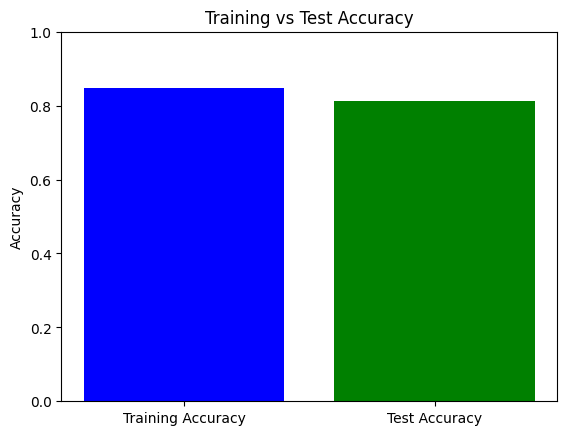

In [46]:
#initializing
dtc = DecisionTreeClassifier(max_depth=5)

#fitting in module
dtc.fit(X_train, Y_train)

#lets find out the accuracy score on training data

Y_train_pred = dtc.predict(X_train)

#lets compare predicted value by our model with the original train Y_train
training_accuracy = accuracy_score(Y_train_pred, Y_train)


#lets find out the accuracy score on test data

Y_test_pred = dtc.predict(X_test)

#lets compare predicted value by our model with the original train Y_test
test_accuracy = accuracy_score(Y_test_pred, Y_test)

##calculating confusion matrix  and classification report for train
conf_matrix_train = confusion_matrix(Y_train, Y_train_pred)
cls_report_train = classification_report(Y_train, Y_train_pred)

##calculating confusion matrix  and classification report for test
conf_matrix_test = confusion_matrix(Y_test, Y_test_pred)
cls_report_test = classification_report(Y_test, Y_test_pred)

#printing
print('Train Accuracy:', round(training_accuracy*100,2))
print('Test Accuracy:', round(test_accuracy*100,2))

##for train
print("confusion matrix:\n", conf_matrix_train)
print("classification report:\n", cls_report_train)

##for test
print("confusion matrix:\n", conf_matrix_test)
print("classification report:\n", cls_report_test)


# Data to plot
labels = ['Training Accuracy', 'Test Accuracy']
accuracy = [training_accuracy, test_accuracy]

# Plotting in graph
plt.bar(labels, accuracy, color=['blue', 'green'])
plt.title('Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

**Random Forest Classifier**

In [47]:
#importing module
from sklearn.ensemble import RandomForestClassifier

Train Accuracy: 94.53
Test Accuracy: 82.29
confusion matrix:
 [[ 97  21]
 [  0 266]]
classification report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90       118
           1       0.93      1.00      0.96       266

    accuracy                           0.95       384
   macro avg       0.96      0.91      0.93       384
weighted avg       0.95      0.95      0.94       384

confusion matrix:
 [[19 11]
 [ 6 60]]
classification report:
               precision    recall  f1-score   support

           0       0.76      0.63      0.69        30
           1       0.85      0.91      0.88        66

    accuracy                           0.82        96
   macro avg       0.80      0.77      0.78        96
weighted avg       0.82      0.82      0.82        96



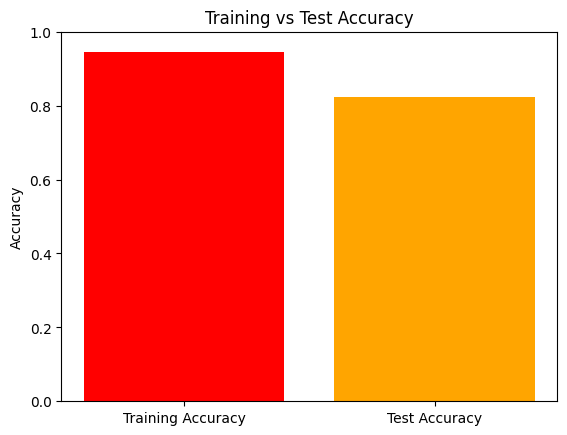

In [48]:
#initializing
rfc = RandomForestClassifier(max_depth=10)

#fitting in module
rfc.fit(X_train, Y_train)

#lets find out the accuracy score on training data

Y_train_pred = rfc.predict(X_train)

#lets compare predicted value by our model with the original train Y_train
training_accuracy = accuracy_score(Y_train_pred, Y_train)


#lets find out the accuracy score on test data

Y_test_pred = rfc.predict(X_test)

#lets compare predicted value by our model with the original train Y_test
test_accuracy = accuracy_score(Y_test_pred, Y_test)

##calculating confusion matrix  and classification report for train
conf_matrix_train = confusion_matrix(Y_train, Y_train_pred)
cls_report_train = classification_report(Y_train, Y_train_pred)

##calculating confusion matrix  and classification report for test
conf_matrix_test = confusion_matrix(Y_test, Y_test_pred)
cls_report_test = classification_report(Y_test, Y_test_pred)

#printing
print('Train Accuracy:', round(training_accuracy*100,2))
print('Test Accuracy:', round(test_accuracy*100,2))

##for train
print("confusion matrix:\n", conf_matrix_train)
print("classification report:\n", cls_report_train)

##for test
print("confusion matrix:\n", conf_matrix_test)
print("classification report:\n", cls_report_test)


# Data to plot
labels = ['Training Accuracy', 'Test Accuracy']
accuracy = [training_accuracy, test_accuracy]

# Plotting in graph
plt.bar(labels, accuracy, color=['red', 'orange'])
plt.title('Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

#Feature Importance

**Using Random Forest Classifier for feature importance:**

In [49]:
#importing necessary library
import seaborn as sb

In [50]:
#initializing
rfc = RandomForestClassifier()

#fitting in module
rfc.fit(X_train, Y_train)

# View a list of the features and their importance scores
print('\nFeatures Importance:')
feature_imp = pd.DataFrame(zip(X.columns.tolist(), rfc.feature_importances_ * 100), columns=['Feature', 'Importance'])

feature_imp


Features Importance:


,Feature,Importance
0,Gender,2.113898
1,Married,2.891673
2,Dependents,4.930830
3,Education,2.428049
4,Self_Employed,2.143496
5,ApplicantIncome,21.396458
6,CoapplicantIncome,11.206241
7,LoanAmount,19.881973
8,Loan_Amount_Term,5.752624
9,Credit_History,22.058125


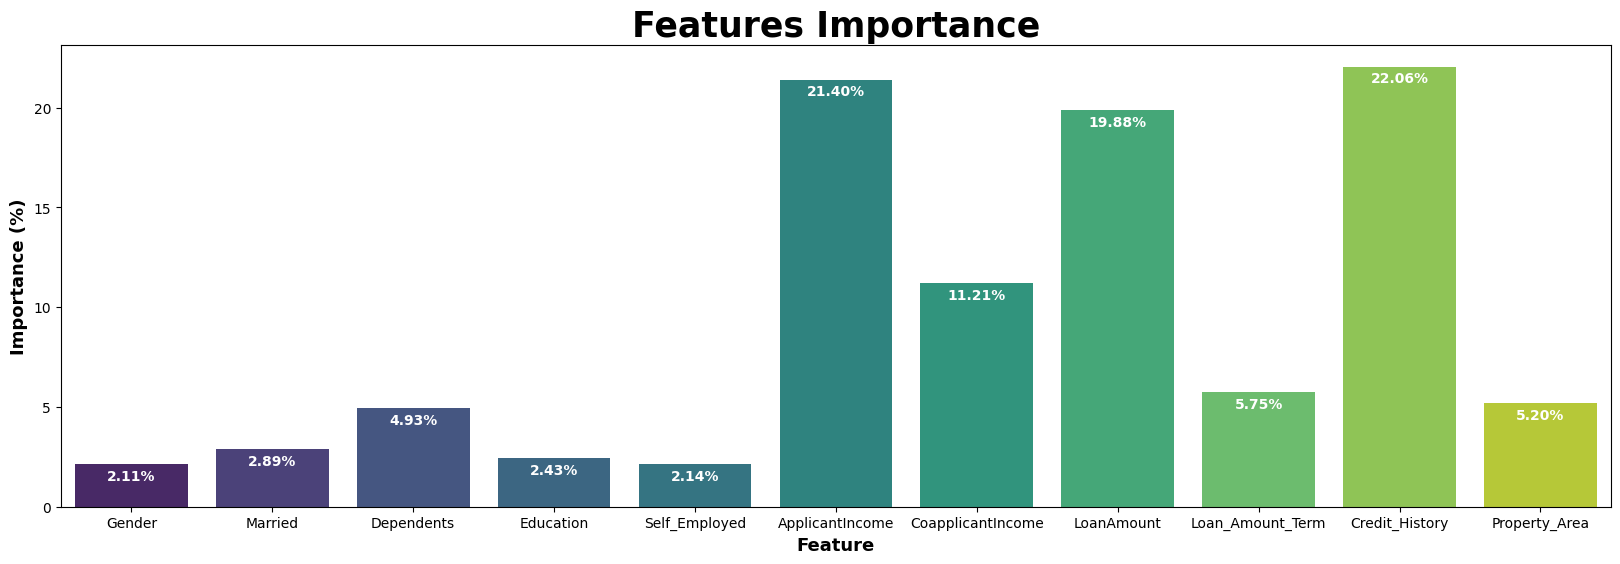

In [51]:
# Features importance plot
plt.figure(figsize=[20,6])
sb.barplot(data=feature_imp, x='Feature', y='Importance', palette = 'viridis')
plt.title('Features Importance', weight='bold', fontsize=25)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13);


# add annotations
impo = feature_imp['Importance']
locs, labels = plt.xticks()

#visualizing percentage at the top-center of the bar
for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')

##Feature Selection

In [52]:
#importing necessary libraries

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict


In [53]:
loan_data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


In [54]:
# Scalling
num_values = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']
scaler = MinMaxScaler()
loan_data[num_values] = scaler.fit_transform(loan_data[num_values])

# Create dummy variables
dummy_var = pd.get_dummies(loan_data)

# Partioning
X_f = dummy_var.drop('Loan_Status', axis=1)
y_f = dummy_var['Loan_Status']

# Oversampling
ros = RandomOverSampler(random_state = 42)
X_resampled, Y_resampled = ros.fit_resample(X_f, y_f)

In [60]:
rfc = RandomForestClassifier()

#making cross-validation prediction
Y_pred = cross_val_predict(rfc, X_resampled, Y_resampled, cv=10)

#calculating confusion matrix and classification report
conf_matrix = confusion_matrix(Y_resampled, Y_pred)
cls_report = classification_report(Y_resampled, Y_pred)

#printing
results = cross_validate(rfc, X_resampled, Y_resampled, cv=10, scoring=['accuracy'], return_train_score=True)
print("Accuracy:", np.round(np.mean(results['test_accuracy']*100),2))
print("confusion matrix:\n", conf_matrix)
print("classification report:\n", cls_report)


Accuracy: 91.28
confusion matrix:
 [[309  23]
 [ 34 298]]
classification report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       332
           1       0.93      0.90      0.91       332

    accuracy                           0.91       664
   macro avg       0.91      0.91      0.91       664
weighted avg       0.91      0.91      0.91       664



**Using Decision Tree Classifier for feature importance:**

In [56]:
#initializing
dtc = DecisionTreeClassifier(max_depth=5)

#fitting in module
dtc.fit(X_train, Y_train)

# View a list of the features and their importance scores
print('\nFeatures Importance:')
feature_imp = pd.DataFrame(zip(X.columns.tolist(), dtc.feature_importances_ * 100), columns=['Feature', 'Importance'])

feature_imp


Features Importance:


,Feature,Importance
0,Gender,0.000000
1,Married,3.521440
2,Dependents,0.000000
3,Education,0.000000
4,Self_Employed,0.000000
5,ApplicantIncome,14.882325
6,CoapplicantIncome,1.525957
7,LoanAmount,11.708732
8,Loan_Amount_Term,7.120812
9,Credit_History,61.240734


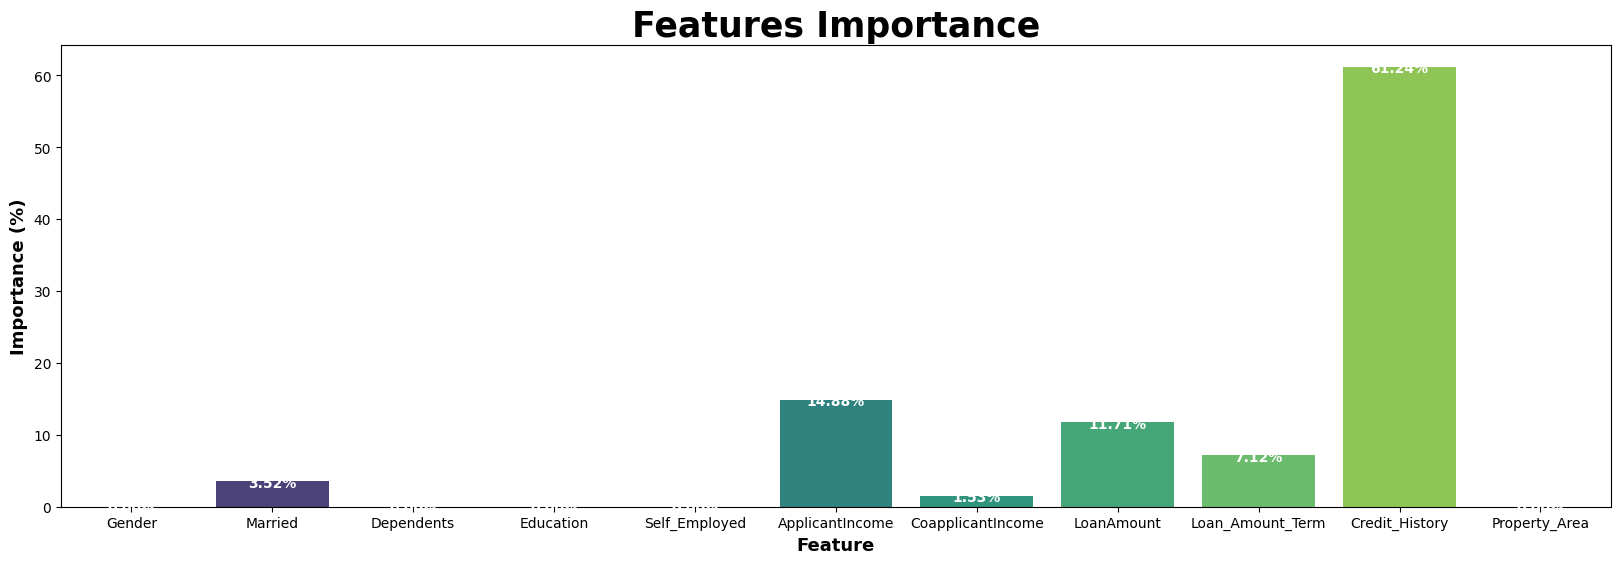

In [57]:
# Features importance plot
plt.figure(figsize=[20,6])
sb.barplot(data=feature_imp, x='Feature', y='Importance', palette = 'viridis')
plt.title('Features Importance', weight='bold', fontsize=25)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13);


# add annotations
impo = feature_imp['Importance']
locs, labels = plt.xticks()

#visualizing percentage at the top-center of the bar
for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')

In [58]:
# Scalling
num_values = ['ApplicantIncome', 'LoanAmount', 'Credit_History']
scaler = MinMaxScaler()
loan_data[num_values] = scaler.fit_transform(loan_data[num_values])

# Create dummy variables
dummy_var = pd.get_dummies(loan_data)

# Partioning
X_f = dummy_var.drop('Loan_Status', axis=1)
y_f = dummy_var['Loan_Status']

# Oversampling
ros = RandomOverSampler(random_state = 42)
X_resampled, Y_resampled = ros.fit_resample(X_f, y_f)

In [63]:
dtc = DecisionTreeClassifier(max_depth=5)

#making cross-validation prediction
Y_pred = cross_val_predict(dtc, X_resampled, Y_resampled, cv=10)

#calculating confusion matrix and classification report
conf_matrix = confusion_matrix(Y_resampled, Y_pred)
cls_report = classification_report(Y_resampled, Y_pred)

#printing
results = cross_validate(rfc, X_resampled, Y_resampled, cv=10, scoring=['accuracy'], return_train_score=True)
print("Accuracy:", np.round(np.mean(results['test_accuracy']*100),2))
print("confusion matrix:\n", conf_matrix)
print("classification report:\n", cls_report)

Accuracy: 90.98
confusion matrix:
 [[181 151]
 [ 50 282]]
classification report:
               precision    recall  f1-score   support

           0       0.78      0.55      0.64       332
           1       0.65      0.85      0.74       332

    accuracy                           0.70       664
   macro avg       0.72      0.70      0.69       664
weighted avg       0.72      0.70      0.69       664

